In [1]:

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.mixture import GaussianMixture


In [3]:
def gen_data(k=3, dim=2, points_per_cluster=2000, lim=[-10, 10]): 
    x = [] 
    mean = np.random.rand(k, dim)*(lim[1]-lim[0]) +  lim[0] 
    for i in range(k): 
        cov = np.random.rand(dim, dim+10) 
        cov = np.matmul(cov, cov.T) 
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster) 
        x += list(_x) 
    x = np.array(x) 
    if(dim == 2): 
        fig = plt.figure() 
        ax = fig.gca() 
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4) 
        ax.autoscale(enable=True) 
    return x 

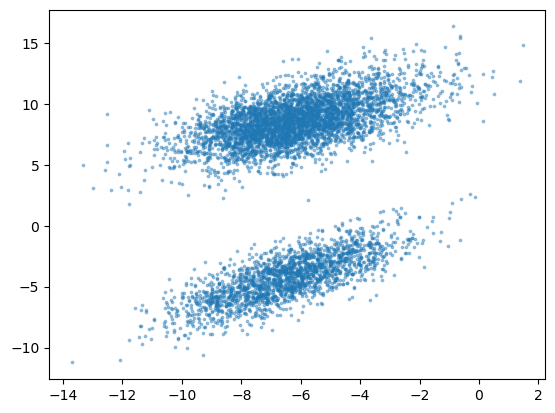

In [5]:
data = gen_data() 

In [6]:
gmm = GaussianMixture(n_components=3) 
gmm.fit(data)

C:\Users\gflab\Anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\gflab\Anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


GaussianMixture(n_components=3)

C:\Users\gflab\AppData\Local\Temp\ipykernel_2464\1148485863.py:8: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180 + angle,color='r', alpha=0.3)


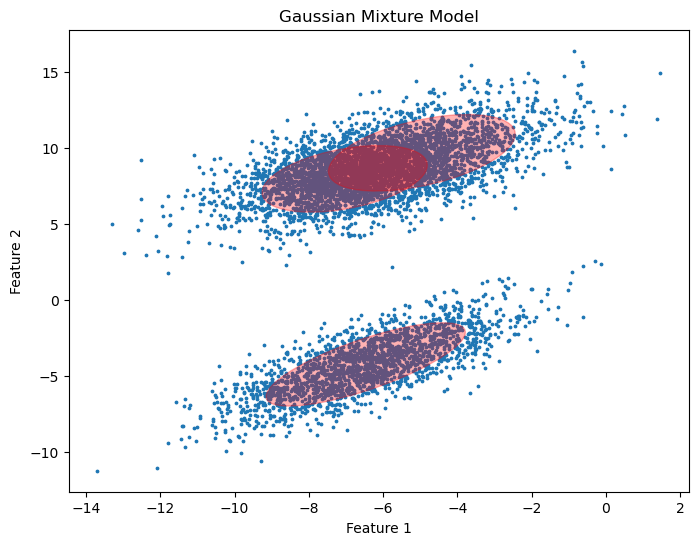

In [7]:
plt.figure(figsize=(8, 6)) 
plt.scatter(data[:, 0], data[:, 1],s=3) 
for covar, mean in  zip(gmm.covariances_,  gmm.means_): 
    v, w = np.linalg.eigh(covar) 
    angle = np.arctan2(w[0][1], w[0][0]) 
    angle = 180 * angle / np.pi 
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v) 
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180 + angle,color='r', alpha=0.3) 
    plt.gca().add_patch(ell) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Gaussian Mixture Model') 
plt.show()